In [1]:
import pandas as pd
from pandas import Series, DataFrame
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
%matplotlib inline

data = pd.read_csv("C:/Users/SS/Desktop/2019-2nd-ml-month-with-kakr/train.csv")
test = pd.read_csv("C:/Users/SS/Desktop/2019-2nd-ml-month-with-kakr/test.csv")
sample = pd.read_csv("C:/Users/SS/Desktop/2019-2nd-ml-month-with-kakr/sample_submission.csv")

data['log_price'] = sp.log1p(data['price'])

data = data[data.sqft_living != 13540]
data= data[data.id != 2302]
data= data[data.id != 4123]
data= data[data.id != 7173]
data= data[data.id != 2775]

for i in ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement'] : 
      
        data[i] = sp.log1p(data[i])
        test[i] = sp.log1p(test[i])
        
data['date'] = data['date'].apply(lambda x : x[0:8])
test['date'] = test['date'].apply(lambda x : x[0:8])

data['yr_renovated'] = data['yr_renovated'].apply(lambda x : sp.nan if x == 0 else x )
data['yr_renovated'] = data['yr_renovated'].fillna(data['yr_built'])

test['yr_renovated'] = test['yr_renovated'].apply(lambda x : sp.nan if x == 0 else x )
test['yr_renovated'] = test['yr_renovated'].fillna(test['yr_built'])

for df in [data, test] : 
    
    df['total_rooms'] = df['bedrooms'] + df['bathrooms']
    df['sqft_ratio'] = df['sqft_living'] / df['sqft_lot']
    df['sqft_total_size'] = df['sqft_above'] + df['sqft_basement']
    df['sqft_ratio15'] = df['sqft_living15'] / df['sqft_lot15'] 
    df['is_renovated'] = df['yr_renovated'] - df['yr_built']
    df['is_renovated'] = df['is_renovated'].apply(lambda x: 0 if x == 0 else 1)
    df['date'] = df['date'].astype('int')
    
data['per_price'] = data['price']/ data['sqft_total_size']
zipcode_price = data.groupby(['zipcode'])['per_price'].agg({'mean','var'}).reset_index()

data = pd.merge(data, zipcode_price,how='left', on='zipcode')
test = pd.merge(test, zipcode_price,how='left', on='zipcode')

for df in [data, test]:
    
    df['mean'] = df['mean'] * df['sqft_total_size']
    df['var'] = df['var'] * df['sqft_total_size']
    
x_train = data.drop(['id','date','price','log_price','per_price'], axis = 1 )
y_train = data['log_price']
x_test = test.drop(['id','date'], axis = 1)

C:\Users\SS\Anaconda31\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


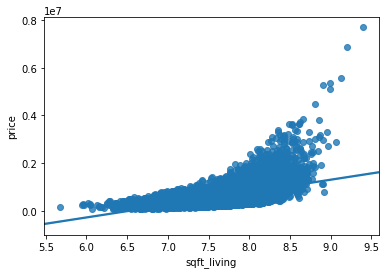

In [10]:
sns.regplot(data.sqft_living, data.price)

In [102]:
import statsmodels.api as sm

result = sm.OLS(data.price , data[['sqft_living']]).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                 3.754e+04
Date:                Fri, 29 Mar 2019   Prob (F-statistic):               0.00
Time:                        13:02:52   Log-Likelihood:            -2.1316e+05
No. Observations:               15030   AIC:                         4.263e+05
Df Residuals:                   15029   BIC:                         4.263e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living  7.295e+04    376.481    193.758      0.000    7.22e+04    7.37e+04
==============================================================================
Omnibus:                    14058.027   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1036610.903
Skew:                           4.323   Prob(JB):                         0.00
Kurtosis:                      42.756   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
lin = LinearRegression().fit(data[['sqft_living','sqft_living2']].values, data[['price']].values)
lin.coef_

array([[-7473804.75016097,   530440.07161813]])

In [99]:
x=  sp.linspace(5.5, 10, 1000)
y=  lin.intercept_ + -7473804.75016097*x + 530440.07161813*x*x 
#y.reshape(-1).shape

In [75]:
x.shape

(1000,)

In [76]:
y.reshape((1000 ,-1 )).shape

(1000, 1)

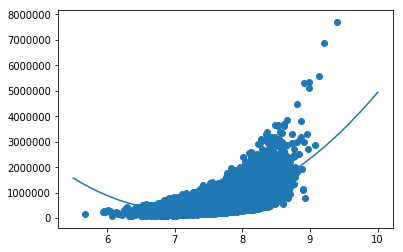

In [101]:
plt.plot(x,y.reshape((1000 ,-1 )))
plt.scatter( data.sqft_living , data.price)

In [81]:
0.2e+07

2000000.0

In [88]:
data['sqft_living2'] = data['sqft_living']*data['sqft_living']

In [103]:
5%3

2

In [104]:
5/3

1.6666666666666667

In [105]:
5//3

1

In [106]:
sp.exp(1)

2.718281828459045